# Making maps

We don't always want to make full collections of photometric images, often we just want a single map of properties of interest. Synthesizer provides some helper methods for making commonly used maps. Unlike the methods used to make collections of photometric images, these map making methods return individual `Image` objects. Like the `Galaxy.get_imgs_luminosity` and `Galaxy.get_imgs_flux` methods, these methods take an `img_type` argument which can either be `"smoothed"` or `"hist"`. Below are examples showing their use. 

Note that some of these are summative (e.g. mass) while others are mass weighted averages (e.g. metallicity and age). 

To plot them we can use the `plot_map` helper functions which can optionally include a colorbar, unlike `plot_image`.

Here we demonstrate the usage of these map methods but to do so we need a galaxy to visualise. For this we will use another CAMELS galaxy.


In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
from synthesizer.imaging import Image
from synthesizer.kernel_functions import Kernel
from synthesizer.load_data.load_camels import load_CAMELS_IllustrisTNG
from unyt import Myr, kpc

galaxy_start = time.time()

# Create galaxy object
gal = load_CAMELS_IllustrisTNG(
    "../../../tests/data/",
    snap_name="camels_snap.hdf5",
    fof_name="camels_subhalo.hdf5",
    physical=True,
)[1]

print("Galaxy created, took:", time.time() - galaxy_start)

print(f"Galaxy has {gal.stars.nstars} stellar particles")
print(f"Galaxy gas {gal.gas.nparticles} gas particles")

Galaxy created, took: 0.022151470184326172
Galaxy has 120 stellar particles
Galaxy gas 1218 gas particles


/opt/hostedtoolcache/Python/3.10.14/x64/lib/python3.10/site-packages/unyt/array.py:1949: RuntimeWarning: invalid value encountered in divide
  out_arr = func(


We also need to define a resolution and a FOV for the maps, and for the smoothed maps we will need a kernel to be defined.

In [2]:
# Define the width of the image
width = 30 * kpc

# Define image resolution (here we arbitrarily set it to
# 200 pixels along an axis)
resolution = width / 200

print(
    "Map width is %.2f kpc with %.2f kpc resolution"
    % (width.value, resolution.value)
)

# Get the SPH kernel
sph_kernel = Kernel()
kernel_data = sph_kernel.get_kernel()

Map width is 30.00 kpc with 0.15 kpc resolution


## Stellar Mass maps

Note that gas maps are also available.

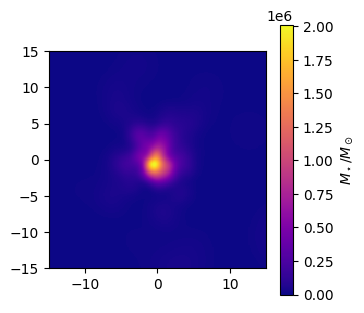

In [3]:
# Make the stellar mass map
stellar_mass_map = gal.get_map_stellar_mass(
    resolution=resolution,
    fov=width,
    img_type="smoothed",
    kernel=kernel_data,
    kernel_threshold=1,
)

fig, ax = stellar_mass_map.plot_map(
    show=True,
    cmap="plasma",
    extent=[-15, 15, -15, 15],
    cbar_label=r"$M_\star/M_\odot$",
)
plt.close(fig)

## Metallicity maps

For metallicity we can either plot the average metallicity in a pixel or the total metal mass in a pixel.

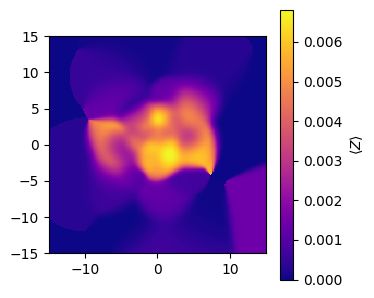

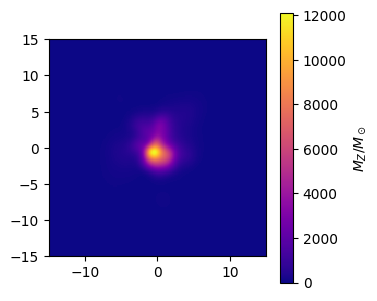

In [4]:
# Make the average stellar metallicity map
metallicity_map = gal.get_map_stellar_metallicity(
    resolution=resolution,
    fov=width,
    img_type="smoothed",
    kernel=kernel_data,
    kernel_threshold=1,
)

fig, ax = metallicity_map.plot_map(
    show=True,
    cmap="plasma",
    extent=[-15, 15, -15, 15],
    cbar_label=r"$\langle Z \rangle $",
)
plt.close(fig)

# Make the stellar metal mass map
metal_map = gal.get_map_stellar_metal_mass(
    resolution=resolution,
    fov=width,
    img_type="smoothed",
    kernel=kernel_data,
    kernel_threshold=1,
)

fig, ax = metal_map.plot_map(
    show=True,
    cmap="plasma",
    extent=[-15, 15, -15, 15],
    cbar_label=r"$M_Z/M_\odot$",
)
plt.close(fig)

## Age maps

We can plot the average age in a pixel. Note that we can provide a normalisation function to the plotting method to scale our colormap.

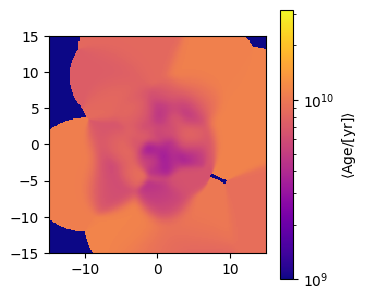

In [5]:
from matplotlib.colors import LogNorm, Normalize

# Make the stellar age map
age_map = gal.get_map_stellar_age(
    resolution=resolution,
    fov=width,
    img_type="smoothed",
    kernel=kernel_data,
    kernel_threshold=1,
)

# Set up a normalisation
norm = LogNorm(vmin=10**9, vmax=10**10.5, clip=True)

fig, ax = age_map.plot_map(
    show=True,
    cmap="plasma",
    extent=[-15, 15, -15, 15],
    cbar_label=r"$\langle \mathrm{Age} / [\mathrm{yr}] \rangle$",
    norm=norm,
)
plt.close(fig)

## SFR maps

By taking all the recently formed stars (those younger than `age_bin`) we can plot SFR maps. By default `age_bin` is 100 Myrs. 

Note that for this example the SFR maps are not particuarly exciting since they are low mass quiescent galaxies.

We can also pass `plot_map` a `tick_formatter` to format the color bar ticks however we desire.

/tmp/ipykernel_4362/266430933.py:17: RuntimeWarning: divide by zero encountered in log10
  tick_formatter = FuncFormatter(lambda x, tick_pos: f"{np.log10(x):.2f}")


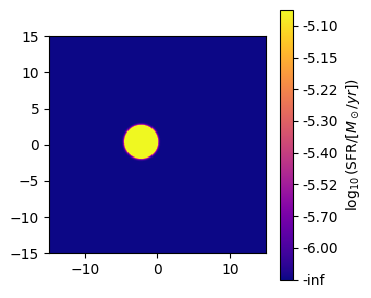

In [6]:
from matplotlib.ticker import FuncFormatter

# Make the SFR map
sfr_map = gal.get_map_sfr(
    resolution=resolution,
    fov=width,
    img_type="smoothed",
    kernel=kernel_data,
    kernel_threshold=1,
    age_bin=100 * Myr,
)

# Set up a normalisation
norm = Normalize(vmin=None, vmax=8.5 * 10**-6, clip=True)

# Set up the tick formatter
tick_formatter = FuncFormatter(lambda x, tick_pos: f"{np.log10(x):.2f}")

fig, ax = sfr_map.plot_map(
    show=True,
    cmap="plasma",
    extent=[-15, 15, -15, 15],
    cbar_label=r"$\log_{10}(\mathrm{SFR} / [M_\odot/yr])$",
    norm=norm,
    tick_formatter=tick_formatter,
)
plt.close(fig)

## sSFR maps

/tmp/ipykernel_4362/266430933.py:17: RuntimeWarning: divide by zero encountered in log10
  tick_formatter = FuncFormatter(lambda x, tick_pos: f"{np.log10(x):.2f}")


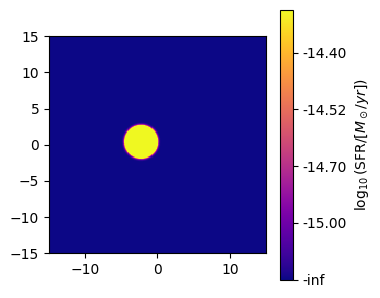

In [7]:
# Make the sSFR map
ssfr_map = gal.get_map_ssfr(
    resolution=resolution,
    fov=width,
    img_type="smoothed",
    kernel=kernel_data,
    kernel_threshold=1,
)

# Set up a normalisation
norm = Normalize(vmin=None, vmax=4.75 * 10**-15, clip=True)

fig, ax = ssfr_map.plot_map(
    show=True,
    cmap="plasma",
    extent=[-15, 15, -15, 15],
    cbar_label=r"$\log_{10}(\mathrm{SFR} / [M_\odot/yr])$",
    norm=norm,
    tick_formatter=tick_formatter,
)
plt.close(fig)

## Making your own map

We haven't made every concievable property or combination of properties into a map method. Should you want to make your own map this can be easily achieved using `Image` objects.

First you need to instantiate an image to hold your map with the resolution and FOV.

In [8]:
# Get the image instance
img = Image(resolution, fov=width)

With the image in hand you need only call the image creation method you want to use, `get_img_hist` for a histogram or `get_img_smoothed` for a smoothed image. These methods take a `signal` argument in addition to the `coordinates` (and `smoothing` lengths and kernel arguments in the smoothed case). This signal is the value that will be sorted/smoothed into pixels. You can pass any particle property for this signal, or indeed any combination of properties. 

For a weighted image you can define multiple images and then divided one by the other to remove the weighting. This is what is done inside the helper methods above.

As an example, below we demonstrate making an `s_oxygen` map.

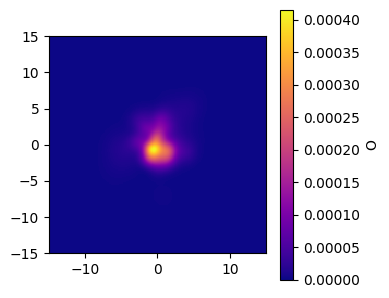

In [9]:
# Get an image of the gas dust-to-metal ratio
img.get_img_smoothed(
    signal=gal.stars.s_oxygen,
    coordinates=gal.stars.coordinates,
    smoothing_lengths=gal.stars.smoothing_lengths,
    kernel=kernel_data,
    kernel_threshold=1,
)

fig, ax = img.plot_map(
    show=True,
    cmap="plasma",
    extent=[-15, 15, -15, 15],
    cbar_label="O",
)